<a href="https://colab.research.google.com/github/matusoff/ML_models/blob/main/NaiveBayesModel_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Build a Naive Bayes model

Let's build a Naive Bayes model to evaluate of retaining National Basketball Association (NBA) players who can last in the high-pressure environment of professional basketball and help the team be successful over time. Let's build a model that predicts whether a player will have an NBA career lasting five years or more.

Dataset: https://drive.google.com/file/d/1UOhH8QzBB7IUu2ugpZskNvVL925zW3ub/view?usp=drive_link

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
data = pd.read_csv("/content/sample_data/nba-players.csv", index_col=0)

In [16]:
data.head(10)

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


In [17]:
data.shape

(1340, 21)

In [18]:
# Display all column names.

print(data.columns)

Index(['name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p',
       'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov',
       'target_5yrs'],
      dtype='object')


The following table provides a description of the data in each column. This metadata comes from the data source, which is listed in the references section of this lab.

|Column Name|Column Description| |:---|:-------| |`name`|Name of NBA player| |`gp`|Number of games played| |`min`|Number of minutes played per game| |`pts`|Average number of points per game| |`fgm`|Average number of field goals made per game| |`fga`|Average number of field goal attempts per game| |`fg`|Average percent of field goals made per game| |`3p_made`|Average number of three-point field goals made per game| |`3pa`|Average number of three-point field goal attempts per game| |`3p`|Average percent of three-point field goals made per game| |`ftm`|Average number of free throws made per game| |`fta`|Average number of free throw attempts per game| |`ft`|Average percent of free throws made per game| |`oreb`|Average number of offensive rebounds per game| |`dreb`|Average number of defensive rebounds per game| |`reb`|Average number of rebounds per game| |`ast`|Average number of assists per game| |`stl`|Average number of steals per game| |`blk`|Average number of blocks per game| |`tov`|Average number of turnovers per game| |`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1340 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov   

In [20]:
data.isnull().sum()

name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

In [21]:
# percentage (%) of values for each class (1, 0) represented in the target column of this dataset.

class_5yrs = (data['target_5yrs'] == 1).sum() * 100 / 1340
print(round(class_5yrs))

class_less_5yrs = (data['target_5yrs'] == 0).sum() *100 / 1340
print(round(class_less_5yrs))

(data['target_5yrs'] == 0). value_counts(normalize=True)

62
38


False    0.620149
True     0.379851
Name: target_5yrs, dtype: float64

##Feature selection

Let's select columns that represent the athleths performans like tov, blk, stl, reb, oreb, dreb, fta, ftm, 3p, and those that represent the athlets capacity such as gp, min, pts.

using these columns let's also create new features. For examples total_points that athlets earned for all games or athlets efficienty descibing athlets capacity in total points divided on number of played game * number of played min.

In [22]:
selected_data = data[['gp', 'min', 'pts', 'fg', '3p', 'ft', 'reb', 'ast', 'stl', 'blk', 'tov', 'target_5yrs']]

selected_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1


In [23]:
# Extract two features that would help predict target_5yrs.
# Create a new variable named `extracted_data`.

extracted_data = selected_data.copy()
extracted_data[['gp', 'min', 'pts']]

#Create new column with new feature
extracted_data['points_all_games'] = extracted_data['gp'] * extracted_data['pts']

#Create new column s with another new feature
extracted_data['efficiency'] = extracted_data['points_all_games'] / extracted_data['min'] * extracted_data['gp']
extracted_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,points_all_games,efficiency
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,350.014599
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,327.881041
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,1861.124183
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,1653.000000
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,901.565217


In [24]:
# Remove any columns from `extracted_data` that are no longer needed.

extracted_data = extracted_data.drop(columns=['gp', 'min', 'pts'])

# Display the first few rows of `extracted_data` to ensure that column drops took place.

extracted_data.head()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,points_all_games,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,350.014599
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,327.881041
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,1861.124183
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,1653.000000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,901.565217


In [ ]:
# Export the extracted data.

extracted_data.to_csv("extracted_nba_players_data.csv", index=0)

In [3]:
extracted_data = pd.read_csv('/content/sample_data/extracted_nba_players.csv')

In [4]:
extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,18.282353


##Model preparation
Isolate your target and predictor variables

In [5]:
# Define the y (target) variable.
y = extracted_data['target_5yrs']

# Define the X (predictor) variables.

X = extracted_data.copy()
X = X.drop('target_5yrs', axis=1)

In [6]:
# the first 10 rows of the target data.

print(y.head(10))
y.value_counts()

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64


1    831
0    509
Name: target_5yrs, dtype: int64

In [7]:
#  the first 10 rows of predictor variables.

X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,18.282353


In [8]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
# Print the shape of X_train.
print(X_train.shape)

# Print the shape of X_test.
print(X_test.shape)

# Print the shape of y_train.
print(y_train.shape)

# Print the shape of y_test.
print(y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


## Model building

In [10]:
nb = GaussianNB()

# Fit the model on your training data.
nb.fit(X_train, y_train)

#Get the predictions on test data
y_preds = nb.predict(X_test)

In [11]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))

print('Precision:', '%.3f' % precision_score(y_test, y_preds))

print('Recall:', '%.3f' % recall_score(y_test, y_preds))

print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.681
Precision: 0.839
Recall: 0.601
F1 Score: 0.700


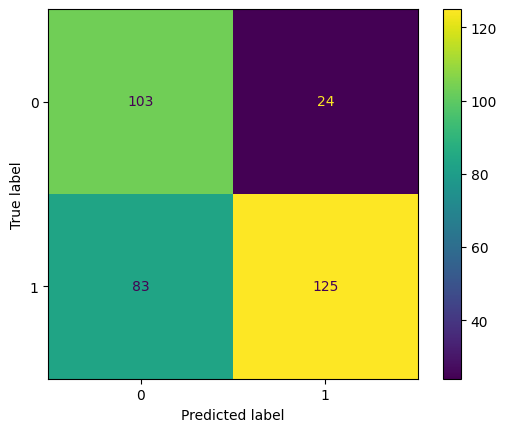

In [12]:
# confusion matrix for predicted and test values.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Return a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )

    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()




# display the confusion matrix
conf_matrix_plot(nb, X_test, y_test)

##Conclusion
 In the given scenario, the model more accurately identified those players who are likely to play for more than five years (true positives) than those who are likely not to play for more than five years (true negatives).